# **Notebook 3: Feature Engineering**

## Objectives

* **Transform Raw Features:**
  * Engineer new features from the raw datasets based on domain knowledge.
  * Refine existing features to enhance their predictive power for the model.
* **Prepare Data for Modeling:**
  * Handle feature scaling, encoding, and transformation for compatibility with machine learning algorithms.
* **Document Key Decisions:**
  * Provide justification for feature engineering steps to ensure reproducibility and transparency.

## Inputs

* **Processed Datasets:**
  * `house_prices_cleaned.csv`: Cleaned version of the house prices dataset containing 1460 rows and 22 columns.
* **Raw Datasets:**
  * `inherited_houses.csv`: Raw version of the inherited houses dataset containing 4 rows and 23 columns, as no cleaning was required.
* **Saved Location:**
  * Processed datasets are located in `outputs/datasets/processed/cleaned/`.
  * Raw dataset for inherited houses is located in `outputs/datasets/raw/`.

## Outputs

* **Feature-Engineered Datasets:**
  * `house_prices_transformed.csv`: Dataset prepared for modeling with transformed and scaled features.
  * `inherited_houses_transformed.csv`: Transformed version of the inherited houses dataset for predictions.
* **Documentation:**
  * Justification and summary of feature engineering steps. 

## Additional Comments

* **Key Considerations:**
  * Domain knowledge and statistical analyses guide feature engineering decisions.
  * Transformations, scaling, and encoding techniques will be applied uniformly across datasets to ensure consistency.
* **Methodology:**
  * This notebook aligns with the Data Preparation and Transformation steps of the CRISP-SM methodology.
* **Next Steps:**
  * The outputs of this notebook will feed into the modeling notebook to build predictive models for house sale prices. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Load and Review Cleaned Data

In this step, we will:
1. Load the cleaned dataset for `house_prices_records.csv` from the processed directory.
2. Load the raw dataset for `inherited_houses.csv` (since no cleaning was necessary).
3. Review the structure and contents of both datasets to ensure readiness for feature engineering.

### Expected Outcomes

1. **House Prices Dataset (`house_prices_cleaned.csv`):**
   - Contains no missing values or duplicates.
   - Includes relevant columns with standardized formatting.
   - Correct data types for all columns (e.g., `SalePrice` as numeric, categorical columns as `object`).
   - The number of rows and columns matches the cleaned dataset structure.

2. **Inherited Houses Dataset (`inherited_houses.csv`):**
   - Matches the structure of the `house_prices_cleaned.csv` dataset minus the `SalePrice` column.
   - Contains no missing values or inconsistencies.

3. **Verification Outputs:**
   - `info()` method confirms that data types and non-null counts are correct.
   - `head()` provides a preview of the first few rows to confirm expected structure.

In [4]:
import pandas as pd

# Load the cleaned dataset for house prices
house_prices_path = "outputs/datasets/processed/cleaned/house_prices_cleaned.csv"
df_cleaned = pd.read_csv(house_prices_path)

# Load the raw dataset for inherited houses
inherited_houses_path = "outputs/datasets/raw/inherited_houses.csv"
df_inherited = pd.read_csv(inherited_houses_path)

# Display basic information about the datasets
print("House Prices Dataset:")
print(df_cleaned.info())
print("\nInherited Houses Dataset:")
print(df_inherited.info())

# Display first few rows of the datasets
print("\nPreview of House Prices Dataset:")
display(df_cleaned.head())
print("\nPreview of Inherited Houses Dataset:")
display(df_inherited.head())

House Prices Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   int64  
 2   BedroomAbvGr  1460 non-null   int64  
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   float64
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalB

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,Glq,150,548,Rfn,2003,...,8450.0,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0,3,Gd,978,Alq,284,460,Rfn,1976,...,9600.0,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866,3,Mn,486,Glq,434,608,Rfn,2001,...,11250.0,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0,0,No,216,Alq,540,642,Unf,1998,...,9550.0,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0,4,Av,655,Glq,490,836,Rfn,2000,...,14260.0,84.0,350.0,84,5,8,1145,2000,2000,250000



Preview of Inherited Houses Dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


---

## Feature Selection

Feature selection is a critical step in the data preparation process. It involves identifying the most relevant features for predicting house sale prices while removing redundant or irrelevant ones. This process enhances model performance, simplifies the modeling process, and improves interpretability.

In this section, we will:
1. Perform correlation analysis to identify strongly correlated features.
2. Use machine learning-based feature importance to rank features.
3. Validate the selected features against domain knowledge to ensure relevance.

### Correlation Analysis

To start, we willevaluate the relationship between each feature and the target variable (`SalePrice`) using correlation coefficients. We will then visualize the results to identify features with strong predictive potential.

**Steps:**
1. Compute Pearson and Spearman correlations between features and `SalePrice`.
2. Visualize the top correlated features using scatter plots and a heatmap.
3. Document observations to guide the next steps.

Top Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
LotArea         0.389000
Name: SalePrice, dtype: float64


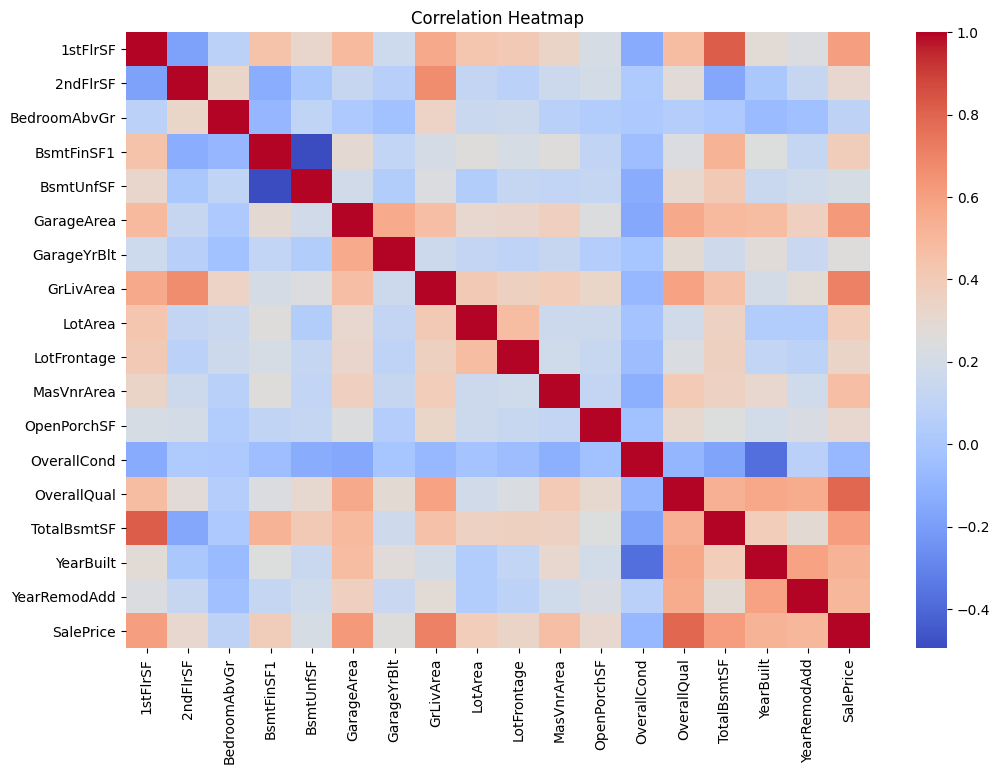

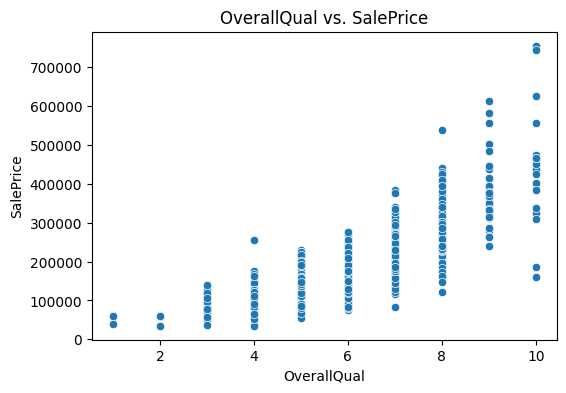

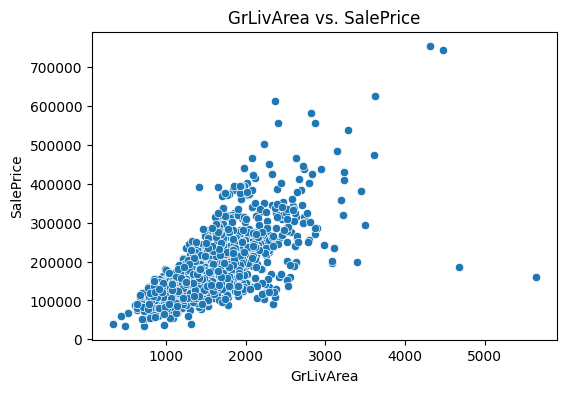

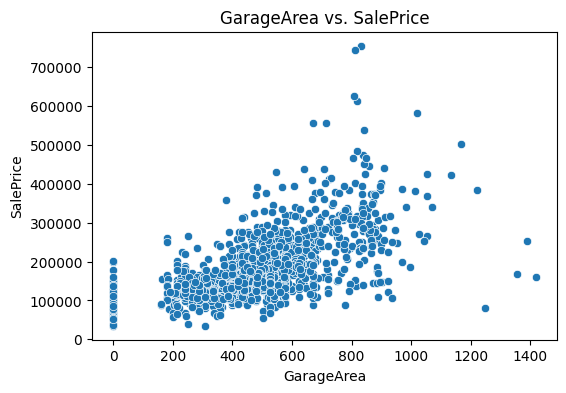

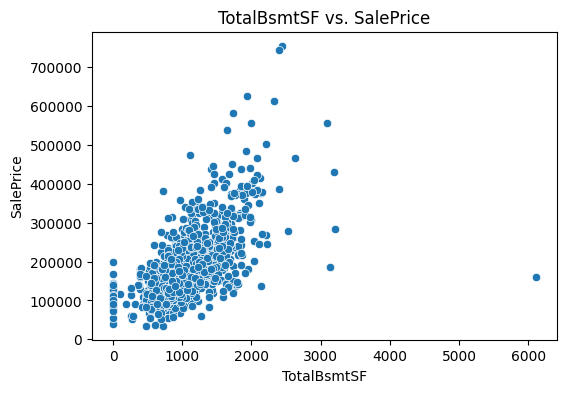

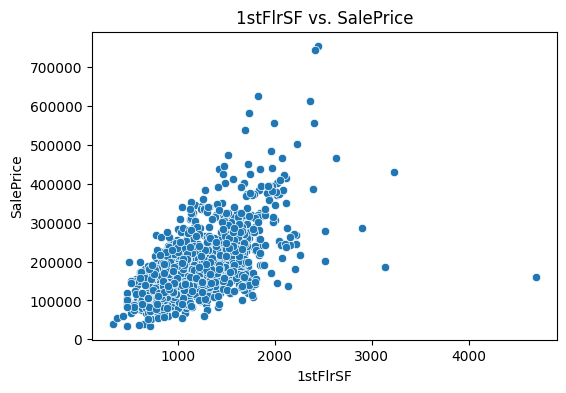

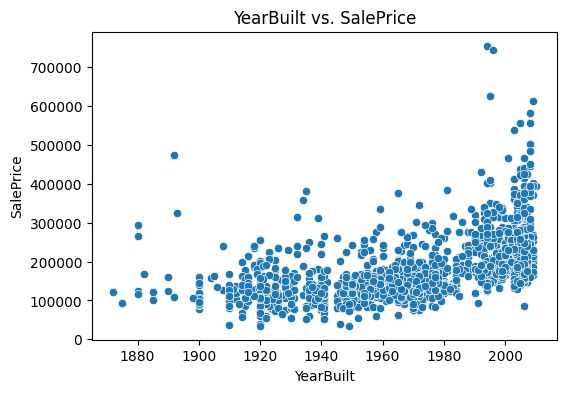

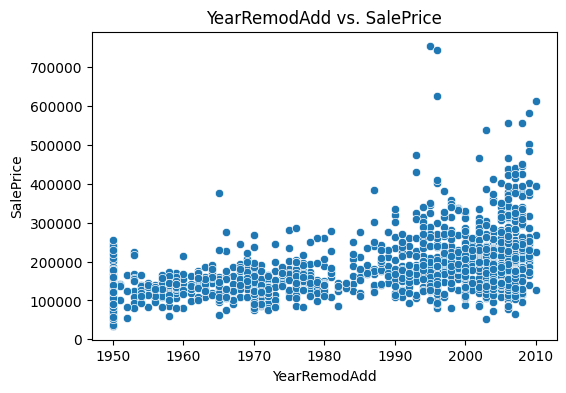

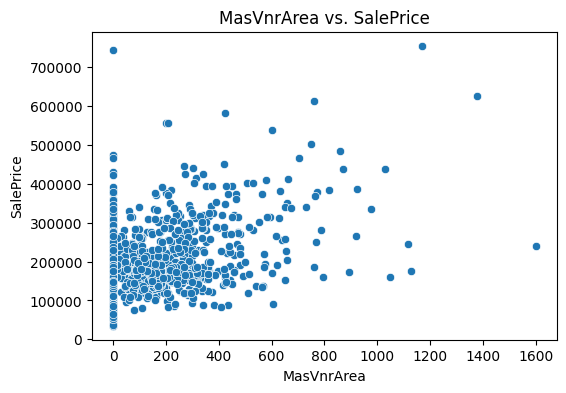

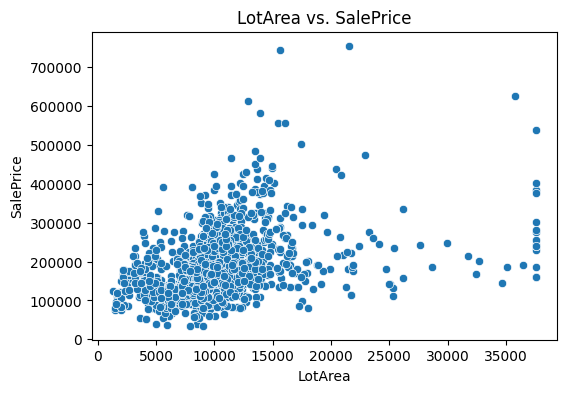

In [5]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Extract top correlated features with SalePrice
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("Top Correlated Features with SalePrice:")
print(top_corr)

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for top features
top_features = top_corr.index[1:]
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='SalePrice', data=df_cleaned)
    plt.title(f"{feature} vs. SalePrice")
    plt.show()

### Feature Importance via Machine Learning

In this step we will use a Random Forest model to evaluate the importance of features for predicting `SalePrice`. This method helps identify features with high predictive power, even if they have non-linear relationships with the target.

**Steps:**
1. Train a simple Random Forest Regressor using the cleaned dataset.
2. Rank features based on their importance scores.
3. Document and visualize the results.

Categorical Columns: Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')
Data after encoding:
   1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
0       856       854             3         706        150         548   
1      1262         0             3         978        284         460   
2       920       866             3         486        434         608   
3       961         0             0         216        540         642   
4      1145         0             4         655        490         836   

   GarageYrBlt  GrLivArea  LotArea  LotFrontage  ...  BsmtFinType1_Lwq  \
0         2003       1710   8450.0         65.0  ...                 0   
1         1976       1262   9600.0         80.0  ...                 0   
2         2001       1786  11250.0         68.0  ...                 0   
3         1998       1717   9550.0         60.0  ...                 0   
4         2000       2198  14260.0         84.0  ...    

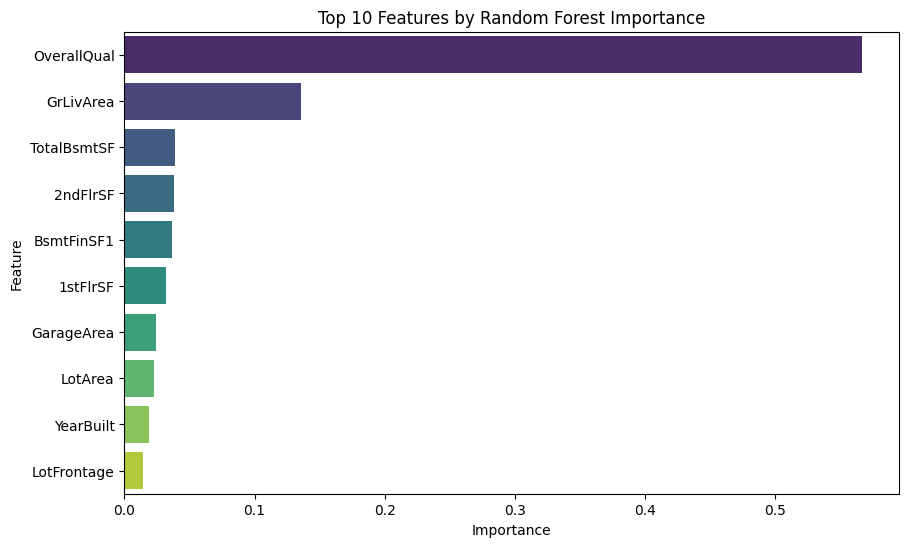

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data
x = df_cleaned.drop(columns=['SalePrice'])
y = df_cleaned['SalePrice']

# Encode categorical variables
categorical_columns = x.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Perform one-hot encoding
x_encoded = pd.get_dummies(x, columns=categorical_columns, drop_first=True)
print("Data after encoding:")
print(x_encoded.head())

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': x_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features by Random Forest Importance")
plt.show()

### Feature Validation

**Observations:**
1. **Key Drivers of Sale Price:**
   - `OverallQual` (Overall Material and Finish Quality) is by far the most important feature contributing approximately 56.7% to the model's predictive power. This reaffirms that the overall quality of a house is a strong determinant of its sale price.
   - `GrLivArea` (Above Ground Living Area) ranks second, with a relative importance of 13.5%, highlighting the impact of livable space on house prices.
2. **Moderately Important Features:**
    - `TotalBsmtSF` (Total Basement Square Footage), `2ndFlrSF` (Second Floor Square Footage), and `BsmtFinSF1` (Finished Basement Square Footage) all have similar contributions, each accounting for approximately 3.6-3.8% of the model's predictions.
    - `1stFlrSF` (First Floor Square Footage) and `GarageArea` (Garage Size) also play noticeable roles in predicting sale prices, emphasizing the value of usable spaces.
3. **Other Influential Features:**
   - `LotArea` (Lot Size) and `LotFrontage` (Street Frontage) are also relevant but less significant, suggesting that external property attributes have a moderate influence on sale prices.
   - `YearBuilt` (Year of Construction) contributes 1.9%, which may capture trends in construction practices or preferences for newer homes.
4. **Implications:**
   - These insights indicate that both internal attributes (e.g., quality, living area) and external attributes (e.g., lot size, frontage) matter, though internal attributes tend to dominate in their influence on sale prices.
   - The feature importance ranking can guide feature selection for downstream modeling efforts, focusing on top predictors like `OverallQual` and `GrLivArea` to improve model edficiency without significant loss of performance.

---

## Feature Transformation

---

## Address Multicollinearity

---

## Create New Features

---

## Scale and Encode Features

---

## Save Final Dataset

---

## Conclusion & Next Steps

---